![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

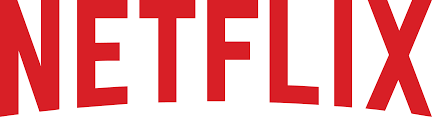

# Precio de las acciones de Netflix a traves del tiempo

***

Alumno: Francisco Javier Gonzalez Lazalde<br>
Docente: Daniel Nuño<br>
Fecha: 4 de Septiembre de 2024<br>
***

## Introducción, objetivo y definición del problema

El precio de las acciones de Netflix ha sido un tema de interés en los últimos años debido a los cambios significativos en la industria del entretenimiento, las fluctuaciones del mercado, y los eventos que han impactado directamente en la compañía, como la pandemia y la competencia creciente en el sector de streaming. Este análisis tiene como objetivo entender los factores que influyen en la variabilidad del precio de las acciones de Netflix, identificar patrones y realizar una predicción sobre su comportamiento a futuro.

### El mercado de acciones

Las acciones representan una porción de propiedad de una empresa y otorgan ciertos derechos a los accionistas, como la posibilidad de participar en la toma de decisiones y el acceso a parte de las ganancias a través de dividendos. Las acciones de Netflix se negocian en el NASDAQ bajo el símbolo "NFLX" y, como todas las acciones, su valor fluctúa en función de factores internos de la empresa y externos relacionados con el mercado global.

El precio de las acciones de Netflix ha sido volátil, alcanzando máximos históricos durante la pandemia de COVID-19 debido al aumento en la demanda de entretenimiento en casa. Sin embargo, también ha enfrentado caídas significativas debido a la creciente competencia de plataformas como Disney+, HBO Max, y Amazon Prime Video, así como a la saturación del mercado en algunos territorios clave.

### ¿Qué influye en el precio de las acciones de Netflix?

- **Resultados financieros:** Las ganancias, ingresos y proyecciones futuras tienen un impacto directo. Un trimestre con buenos resultados suele elevar el precio de las acciones.
<br>

- **Crecimiento de suscriptores:** El número de nuevos suscriptores es un indicador crucial. Cuando Netflix no alcanza sus metas, los inversores suelen reaccionar de manera negativa.
<br>

- **Competencia:** El crecimiento de otras plataformas de streaming ejerce presión sobre Netflix. Cada nuevo competidor puede reducir la participación de mercado de la empresa.
<br>

- **Cambios regulatorios:** Leyes y normativas en diferentes países pueden afectar el acceso a ciertos mercados o imponer restricciones a la empresa.
<br>

- **Innovación y contenidos originales:** La capacidad de Netflix de lanzar series y películas exitosas juega un rol importante en atraer y retener suscriptores.

### Definir qué pronosticar
Se realizará un análisis de los precios históricos de las acciones de Netflix para intentar predecir la dirección futura del precio. Se usará el cierre de las acciones a lo largo de los últimos años, prestando especial atención a las tendencias observadas durante eventos clave, como la pandemia y los lanzamientos de competidores. El objetivo será crear un modelo de predicción que permita anticipar el comportamiento del precio a corto y mediano plazo.

### ¿Por qué es importante analizar y pronosticar el precio de las acciones de Netflix?
El análisis del precio de las acciones de Netflix es crucial no solo para inversores, sino también para comprender las tendencias del mercado en el sector del entretenimiento. Netflix ha sido un actor dominante, y su rendimiento puede ser un indicador del estado de la industria del streaming.

Las acciones de Netflix son un reflejo del estado cambiante del mercado de streaming y de cómo la empresa enfrenta los desafíos de la competencia y las demandas del consumidor.

## Datos

Los datos se obtuvieron gracias a la biblioteca yfinance, la cual es una herramienta de Python que permite descargar datos financieros de Yahoo Finance.

In [4]:
import yfinance as yf

stock = "NFLX"
ticker = yf.Ticker(stock)
data = ticker.history(start="2013-01-01", end="2023-12-31", interval="1mo")["Close"]

Date
2013-01-01 00:00:00-05:00    23.605715
2013-02-01 00:00:00-05:00    26.868570
2013-03-01 00:00:00-05:00    27.040001
2013-04-01 00:00:00-04:00    30.867144
2013-05-01 00:00:00-04:00    32.321430
Name: Close, dtype: float64

### Formato correcto

In [5]:
type(data)

pandas.core.series.Series

In [6]:
data.index

DatetimeIndex(['2013-01-01 00:00:00-05:00', '2013-02-01 00:00:00-05:00',
               '2013-03-01 00:00:00-05:00', '2013-04-01 00:00:00-04:00',
               '2013-05-01 00:00:00-04:00', '2013-06-01 00:00:00-04:00',
               '2013-07-01 00:00:00-04:00', '2013-08-01 00:00:00-04:00',
               '2013-09-01 00:00:00-04:00', '2013-10-01 00:00:00-04:00',
               ...
               '2023-03-01 00:00:00-05:00', '2023-04-01 00:00:00-04:00',
               '2023-05-01 00:00:00-04:00', '2023-06-01 00:00:00-04:00',
               '2023-07-01 00:00:00-04:00', '2023-08-01 00:00:00-04:00',
               '2023-09-01 00:00:00-04:00', '2023-10-01 00:00:00-04:00',
               '2023-11-01 00:00:00-04:00', '2023-12-01 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=132, freq=None)

In [7]:
data.head()

Date
2013-01-01 00:00:00-05:00    23.605715
2013-02-01 00:00:00-05:00    26.868570
2013-03-01 00:00:00-05:00    27.040001
2013-04-01 00:00:00-04:00    30.867144
2013-05-01 00:00:00-04:00    32.321430
Name: Close, dtype: float64

### Entrenamiento y prueba

In [9]:
import numpy as np

data_size = len(data)

train_size = int(data_size * 0.8)

train_data = data.iloc[:train_size]  
test_data = data.iloc[train_size:]   

print(f"Datos de entrenamiento: {len(train_data)}")
print(f"Datos de prueba: {len(test_data)}")

Datos de entrenamiento: 105
Datos de prueba: 27


## Análisis exploratorio

### Visualizaciones

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

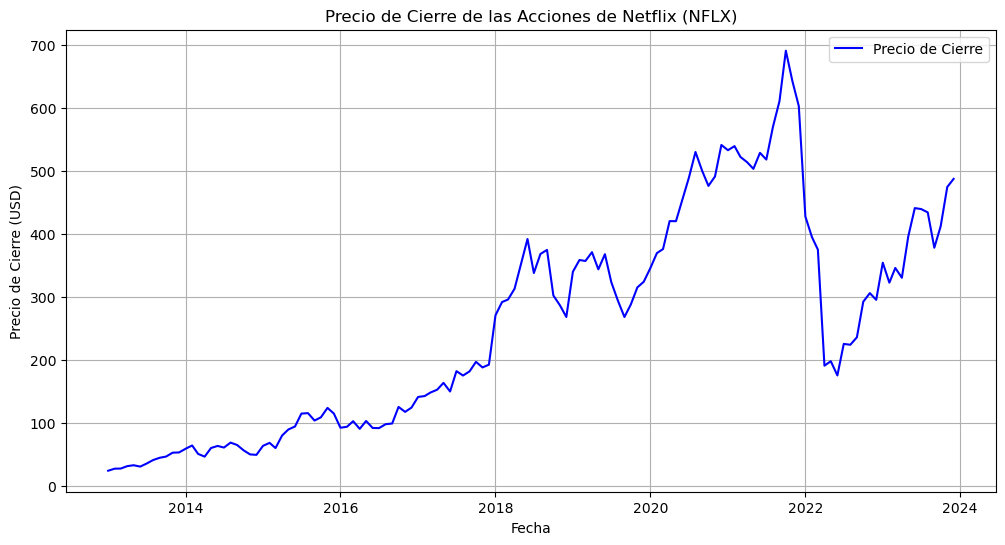

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(data, label="Precio de Cierre", color='blue')
plt.title("Precio de Cierre de las Acciones de Netflix (NFLX)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre (USD)")
plt.legend()
plt.grid(True)
plt.show()

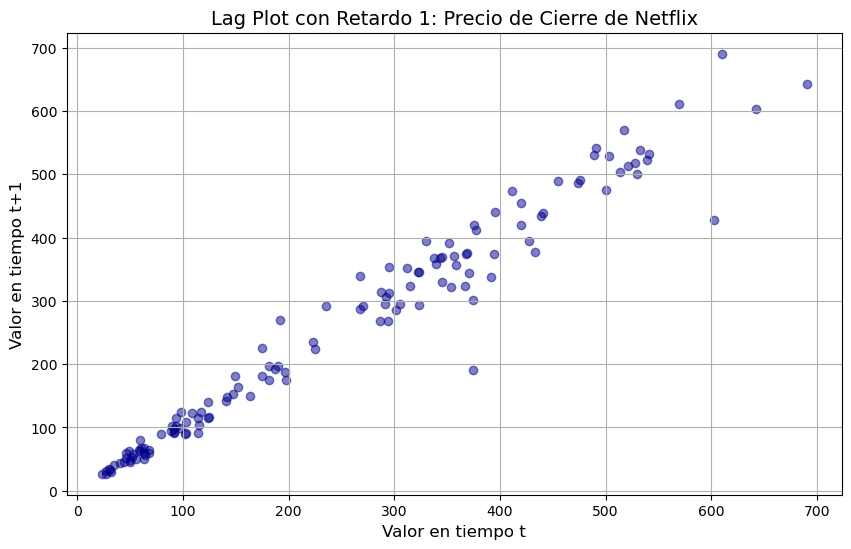

In [17]:
from pandas.plotting import lag_plot

plt.figure(figsize=(10, 6))  
lag_plot(data, lag=1, c='darkblue', marker='o', alpha=0.5) 
plt.title("Lag Plot con Retardo 1: Precio de Cierre de Netflix", fontsize=14) 
plt.xlabel("Valor en tiempo t", fontsize=12) 
plt.ylabel("Valor en tiempo t+1", fontsize=12)
plt.grid(True)
plt.show()

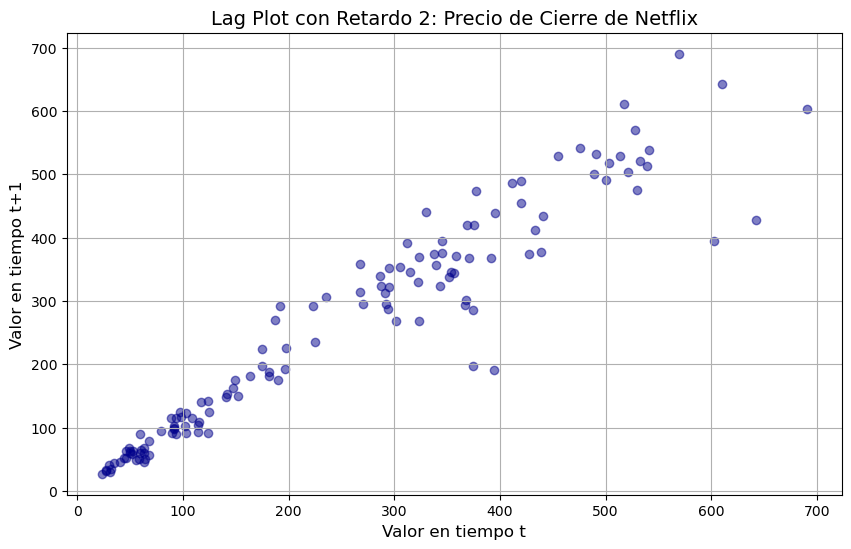

In [20]:
plt.figure(figsize=(10, 6))  
lag_plot(data, lag=2, c='darkblue', marker='o', alpha=0.5) 
plt.title("Lag Plot con Retardo 2: Precio de Cierre de Netflix", fontsize=14) 
plt.xlabel("Valor en tiempo t", fontsize=12) 
plt.ylabel("Valor en tiempo t+1", fontsize=12)
plt.grid(True)
plt.show()

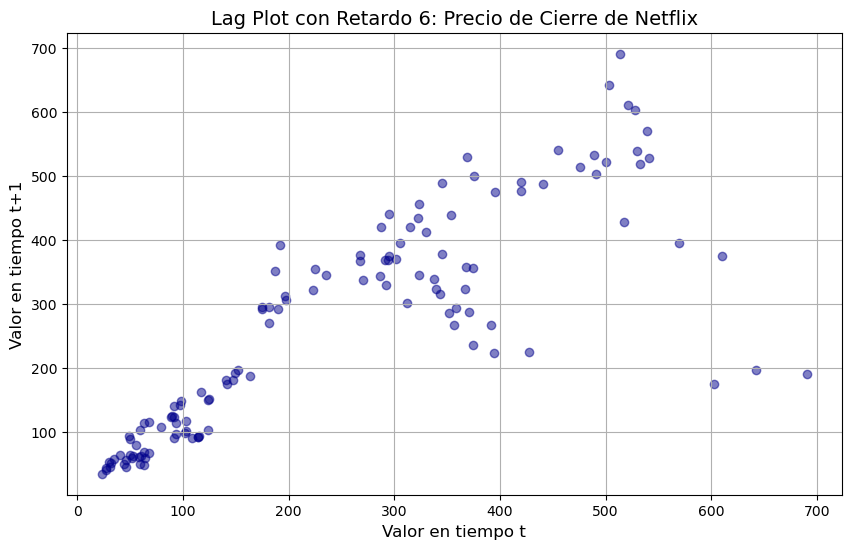

In [21]:
plt.figure(figsize=(10, 6))  
lag_plot(data, lag=6, c='darkblue', marker='o', alpha=0.5) 
plt.title("Lag Plot con Retardo 6: Precio de Cierre de Netflix", fontsize=14) 
plt.xlabel("Valor en tiempo t", fontsize=12) 
plt.ylabel("Valor en tiempo t+1", fontsize=12)
plt.grid(True)
plt.show()

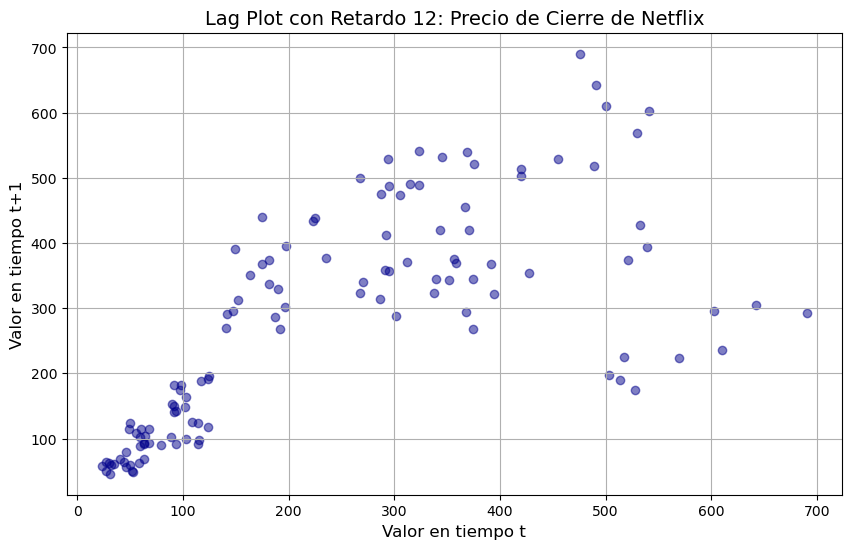

In [22]:
plt.figure(figsize=(10, 6))  
lag_plot(data, lag=12, c='darkblue', marker='o', alpha=0.5) 
plt.title("Lag Plot con Retardo 12: Precio de Cierre de Netflix", fontsize=14) 
plt.xlabel("Valor en tiempo t", fontsize=12) 
plt.ylabel("Valor en tiempo t+1", fontsize=12)
plt.grid(True)
plt.show()

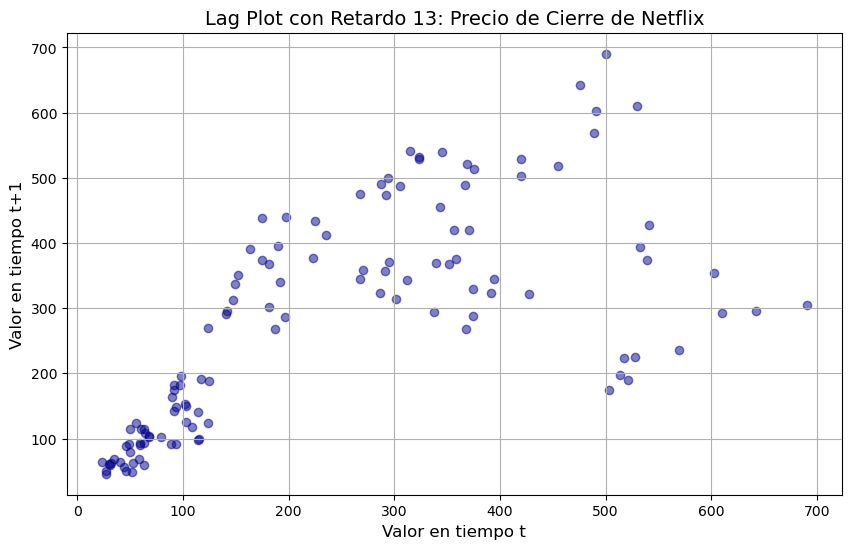

In [23]:
plt.figure(figsize=(10, 6))  
lag_plot(data, lag=13, c='darkblue', marker='o', alpha=0.5) 
plt.title("Lag Plot con Retardo 13: Precio de Cierre de Netflix", fontsize=14) 
plt.xlabel("Valor en tiempo t", fontsize=12) 
plt.ylabel("Valor en tiempo t+1", fontsize=12)
plt.grid(True)
plt.show()

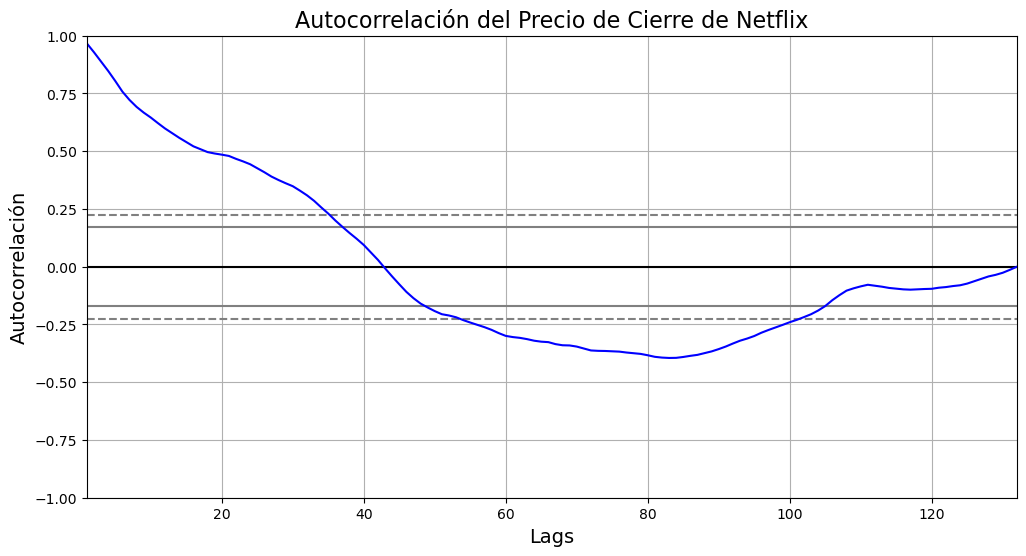

In [26]:
plt.figure(figsize=(12, 6)) 
pd.plotting.autocorrelation_plot(data, color='blue')

plt.title("Autocorrelación del Precio de Cierre de Netflix", fontsize=16)
plt.xlabel("Lags", fontsize=14)
plt.ylabel("Autocorrelación", fontsize=14)

plt.show()

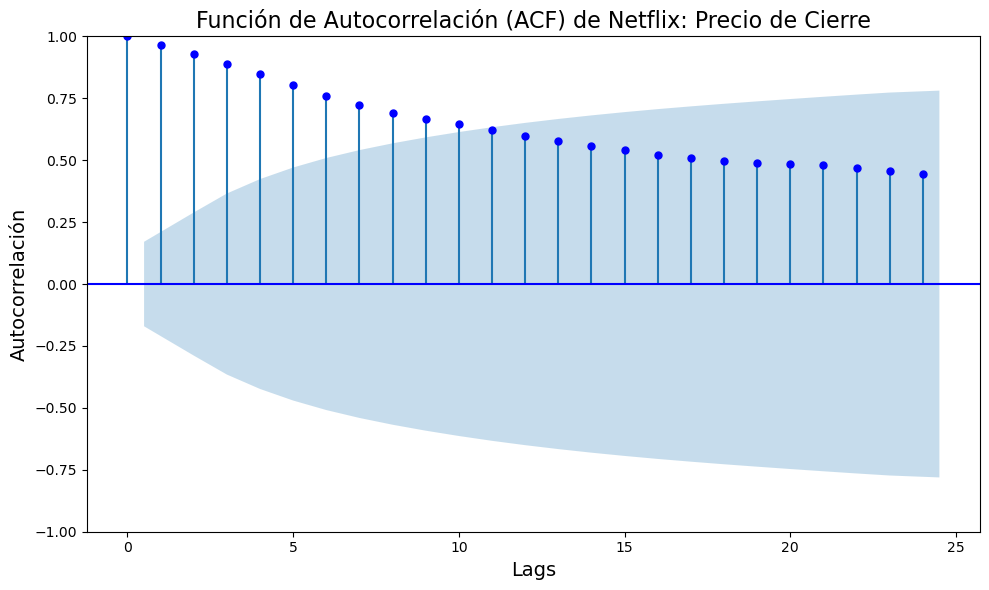

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))  
plot_acf(data, lags=24, ax=ax, alpha=0.05, color='blue')

ax.set_title("Función de Autocorrelación (ACF) de Netflix: Precio de Cierre", fontsize=16)
ax.set_xlabel("Lags", fontsize=14)
ax.set_ylabel("Autocorrelación", fontsize=14)

plt.show()

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2013-01-01 00:00:00-05:00   NaN
2013-02-01 00:00:00-05:00   NaN
2013-03-01 00:00:00-05:00   NaN
2013-04-01 00:00:00-04:00   NaN
2013-05-01 00:00:00-04:00   NaN
                             ..
2023-08-01 00:00:00-04:00   NaN
2023-09-01 00:00:00-04:00   NaN
2023-10-01 00:00:00-04:00   NaN
2023-11-01 00:00:00-04:00   NaN
2023-12-01 00:00:00-05:00   NaN
Name: trend, Length: 132, dtype: float64
Date
2013-01-01 00:00:00-05:00     4.143639
2013-02-01 00:00:00-05:00     2.685685
2013-03-01 00:00:00-05:00    -1.547458
2013-04-01 00:00:00-04:00   -16.925305
2013-05-01 00:00:00-04:00    -8.183287
                               ...    
2023-08-01 00:00:00-04:00     4.377245
2023-09-01 00:00:00-04:00     1.782589
2023-10-01 00:00:00-04:00     9.172798
2023-11-01 00:00:00-04:00     5.376733
2023-12-01 00:00:00-05:00     1.376598
Name: seasonal, Length: 132, dtype: float64
Date
2013-01-01 00:00:00-05:00   NaN
2013-02-01 00:00:00-05:00   NaN
2013-03-01 00:00:00-05:00   NaN
2013-04-01 00:00:00-04:

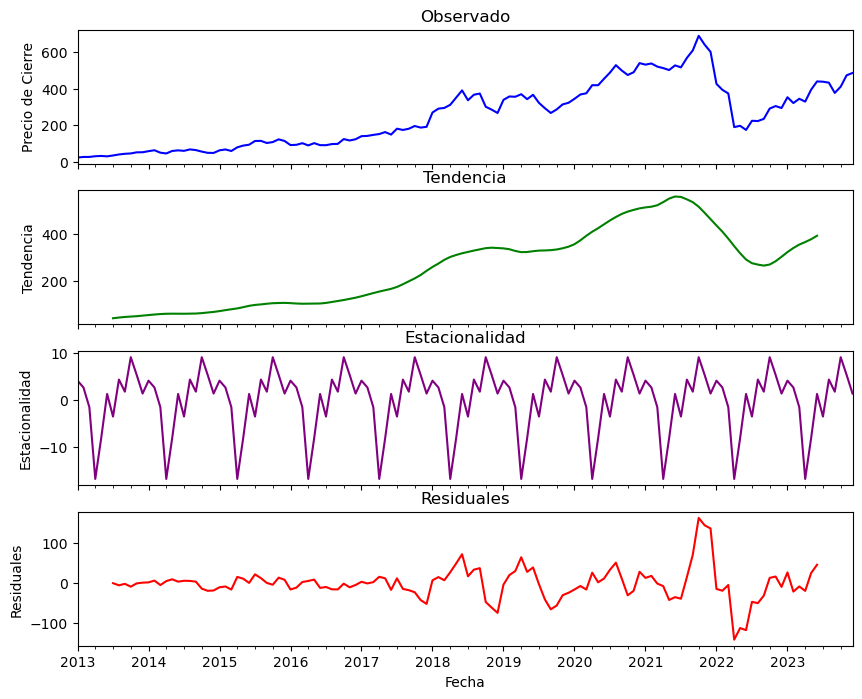

In [37]:
result = seasonal_decompose(data, model='additive')

fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

result.observed.plot(ax=axes[0], title='Observado', color='blue')
axes[0].set_ylabel("Precio de Cierre")

result.trend.plot(ax=axes[1], title='Tendencia', color='green')
axes[1].set_ylabel("Tendencia")

result.seasonal.plot(ax=axes[2], title='Estacionalidad', color='purple')
axes[2].set_ylabel("Estacionalidad")

result.resid.plot(ax=axes[3], title='Residuales', color='red')
axes[3].set_ylabel("Residuales")
axes[3].set_xlabel("Fecha")

plt.show()

In [11]:
data.describe()

count    132.000000
mean     254.635379
std      173.662821
min       23.605715
25%       93.017502
50%      251.529999
75%      374.817497
max      690.309998
Name: Close, dtype: float64